<a href="https://colab.research.google.com/github/sabrinaMKE201073/Data-Analysis-with-Python-/blob/main/Part_2_DA_(Data_Preprocessing)18_june.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 2 - Data Wrangling**

**`1) Pre-processing Data in Python`**

- identify & handling missing values
- data formatting (in various form)
- data normalization (centering/scaling)
- data binning
- turn categorical values to numeric variable


In [ ]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header = None)

#For example, below is dataframe for sample of cars with all categories
#(including price)
#each row = represent sample of car (different used car)
#each column = name of column


#replace default header using (df.columns = headers)
headers = ["symboling","normalized-loss","make","fuel-type","aspiration",
           "num-of-doors","body-style","drive-wheels","engine-location",
           "wheel-base","length","width","height","curb-weight","engine-type",
           "num-of-cylinders","engine-size","fuel-system","bore","stroke",
           "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg",
           "price"
]
df.columns = headers
df

,symboling,normalized-loss,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
#we can access different column, by specify name of column
df["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [ ]:
df["body-style"]

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 205, dtype: object

**`2) Dealing with Missing Values in Python`**

- missing values could be represented as
  `"?", "N/A", 0 or just a blank cell.`

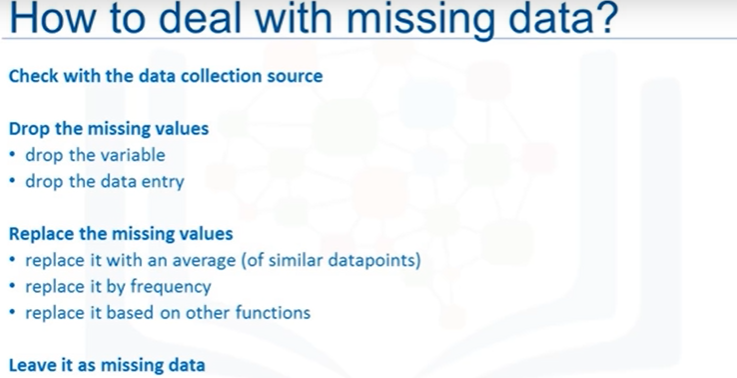

In [ ]:
df.dropna(subset=["price"], axis = 0, inplace = True)
df
#inplace = True,,, alllow modification to be done on dataset directly.

,symboling,normalized-loss,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.describe(include = "all")

,symboling,normalized-loss,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [ ]:
#to replace missing value in Python,
#df.replace(missing_value, new_value):

#First, we want to replace missing value "?" to NaN
df1 = df.replace('?', np.NaN)
df1

,symboling,normalized-loss,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
#Next, we want to change it the mean value (as per below)

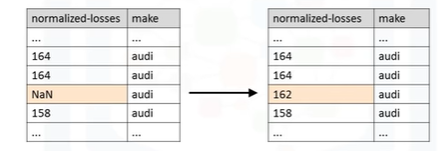

In [ ]:
# Convert "normalized-loss" column to numeric values & calculate mean
df1["normalized-loss"] = pd.to_numeric(df1["normalized-loss"], errors="coerce")
mean1 = df1["normalized-loss"].mean()
# errors="coerce", means any non-numeric values will be converted to NaN (Not a Number).
# so that, the mean() function will ignore those NaN values while calculating the mean.

# Replace missing values with the calculated mean
df1["normalized-loss"].fillna(mean1, inplace=True)

In [ ]:
df1

,symboling,normalized-loss,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


**`3) Data Formatting in Python`**

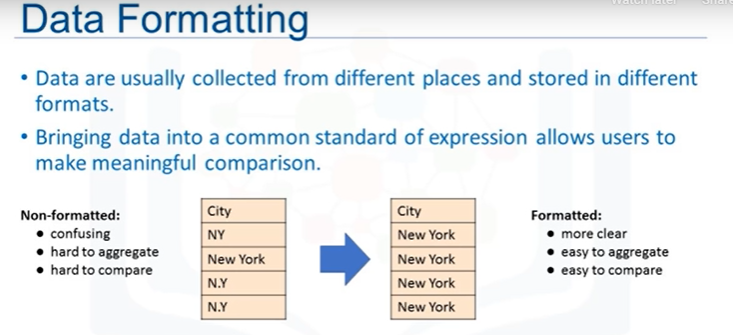

For Example, for column of (car fuel cosumption: "city-mpg"), most people don't familiar with mpg
- mpg stand for miles/gallon unit
- Hence, we can also change it to more clear data which is L/100km which L = litre

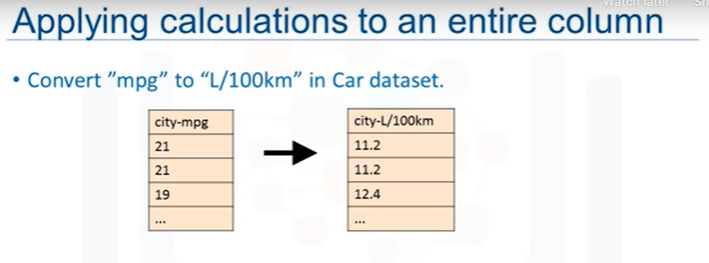

In [ ]:
##In order to do so, is as per below:
df1["city-mpg"] = 235/df1["city-mpg"]

#mpg to L/100km = 235 divide each value in city-mpg colum

In [ ]:
#then, we rename column name "city-mpg" to "city-L/100km"
df1.rename(columns={"city-mpg": "city-L/100km"}, inplace=True)
df1

,symboling,normalized-loss,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,10.217391,28,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,12.368421,25,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,13.055556,23,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,9.038462,27,22470


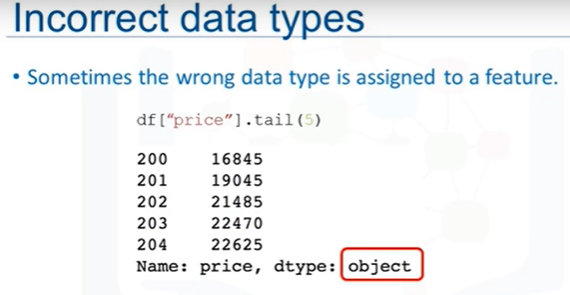

Sometimes, the data type in python is incorrectly establisthed.

- `df["price"]` is `supposed to be float/int`
- but in this dataframe, python incorrectly assigned it as object data

In [ ]:
# How to identify data types is by using df.dtypes
df1.dtypes

symboling              int64
normalized-loss      float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L/100km         float64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
#How to correcting the datatype is by using df.astype()
df1["price"] = df1["price"].astype("Int64")

In [ ]:
df1.dtypes

symboling              int64
normalized-loss      float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L/100km         float64
highway-mpg            int64
price                  Int64
dtype: object

**`4) Data Normalization in Python`**

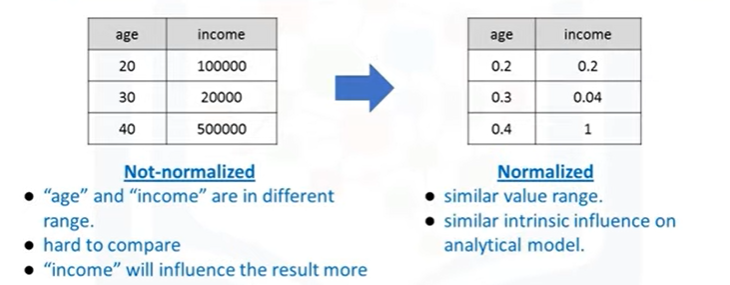

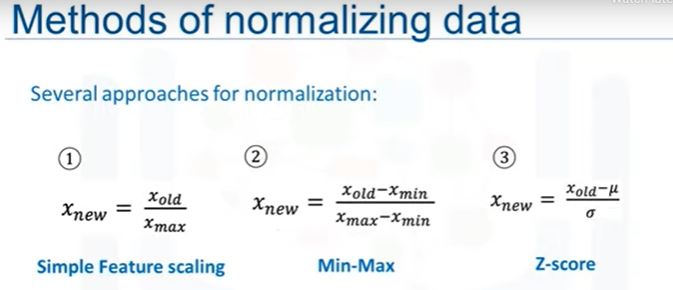

- μ = is the average of the feature,
- σ (sigma) = standard deviation

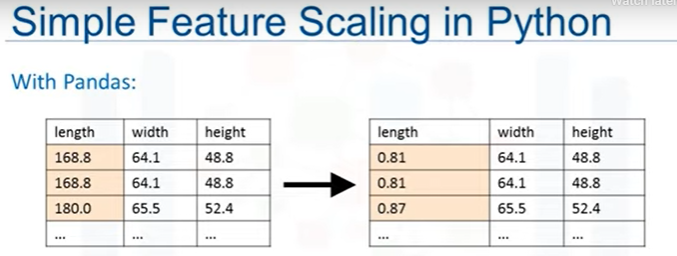

In [ ]:
#simple feature scaling method
df1["length"] = df1["length"]/df1["length"].max()
df1["length"]

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 205, dtype: float64

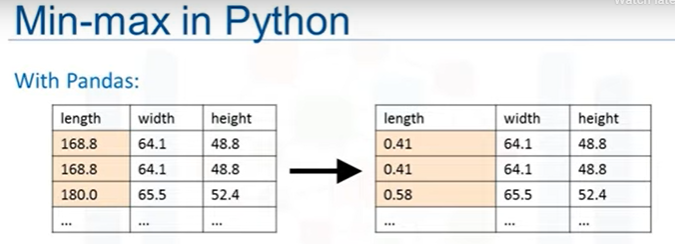

In [ ]:
#2nd method of data normalization: Min-Max method
df1["length"] = (df1["length"] - df1["length"].min())/(df1["length"].max() - df1["length"].min())
df1["length"]

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 205, dtype: float64

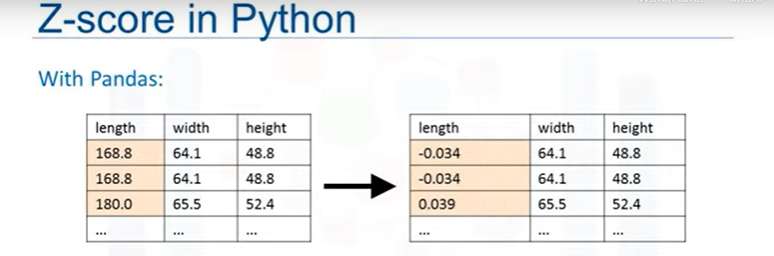

In [ ]:
#3rd method of data normalization: Z-score method
df1["length"] = (df1["length"] - df1["length"].mean())/df1["length"].std()
df1["length"]

0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length, Length: 205, dtype: float64

**`5) Binning in Python`**

- Binning = Grouping of values into "bins"
- converts numeric values into set of "bins"

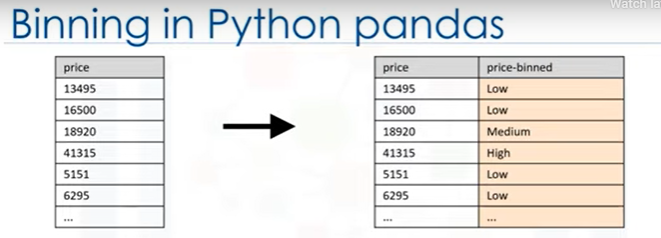

In [ ]:
#How to use binning method

#1st, use numpy function ".linspace"
#to return array "bins" which contain 4 equally space numbers over specified intervals

#2nd, create group name which contain different bin names.
#3rd, use pandas function "cut" to segment & sort data values into bins.

bins = np.linspace(min(df1["price"]), max(df1["price"]), 4)
group_names = ["Low","Medium","High"]
df1["price-binned"] = pd.cut(df1["price"], bins, labels = group_names, include_lowest=True)
df1["price-binned"]

0         Low
1      Medium
2      Medium
3         Low
4      Medium
        ...  
200    Medium
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 205, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Text(0.5, 1.0, 'price-binned')

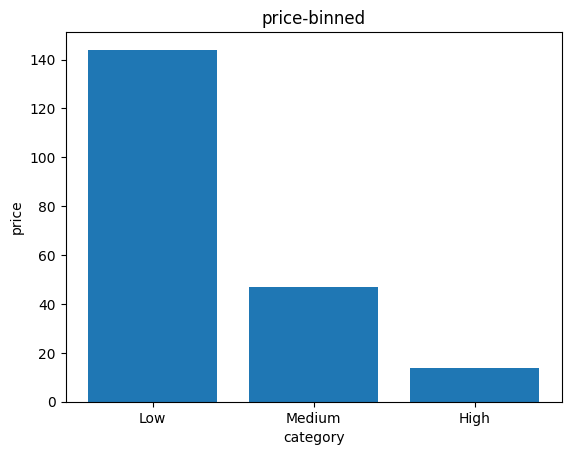

In [ ]:
#let's see the bar plot for the price-binned that we have categorized
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df1["price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("category")
plt.pyplot.ylabel("price")
plt.pyplot.title("price-binned")

Text(0.5, 1.0, 'price-binned histogram')

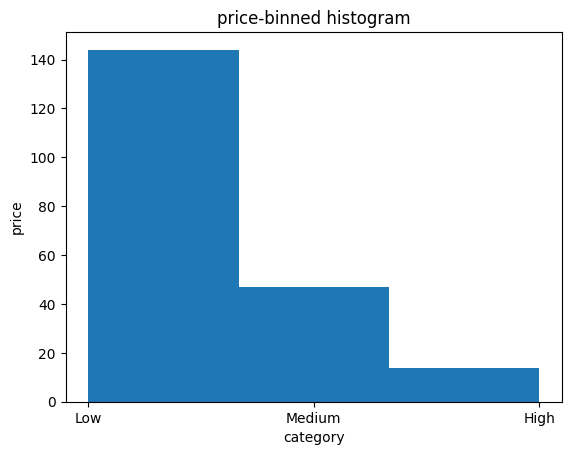

In [ ]:
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df1["price-binned"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("category")
plt.pyplot.ylabel("price")
plt.pyplot.title("price-binned histogram")

**`6) Turning categorical variables into quantitative variables in Python`**

- Problem: most statistical models cannot take objects/strings as input

- Solution:
 - Add dummy variables for each unique category
 - assign 0 or 1 in each category


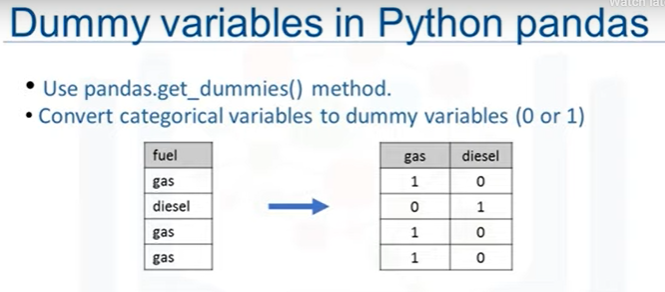

In [ ]:
#How to convert categorical variable into dummy variables (0 or 1)
#use pandas.get_dummies() method

dummy_variable = pd.get_dummies(df1["fuel-type"])
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# to make it more clear and precise, re-label the column name
dummy_variable.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# merge data frame "df1" and "dummy_variable"
df1 = pd.concat([df1, dummy_variable], axis=1)

# drop original column "fuel-type" from "df1"
df1.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df1.head()

,symboling,normalized-loss,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,-0.425480,...,2.68,9.0,111,5000,11.190476,27,13495,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,-0.425480,...,2.68,9.0,111,5000,11.190476,27,16500,Medium,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,-0.230948,...,3.47,9.0,154,5000,12.368421,26,16500,Medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.206750,...,3.40,10.0,102,5500,9.791667,30,13950,Low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.206750,...,3.40,8.0,115,5500,13.055556,22,17450,Medium,0,1


# **LAB 2: PRACTICE TIME**

In [ ]:
#Q1: replace NaN in "stroke" column with the mean value

#Calculate the mean vaule for "stroke" column
avg_stroke = df1["stroke"].astype("float64").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df1["stroke"].replace(np.NaN, avg_stroke, inplace = True)
df1.head()

Average of stroke: 3.2554228855721394


,symboling,normalized-loss,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500,Medium
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450,Medium


In [ ]:
#Q3: normalize the column "height"

df1['height'] = df1['height']/df1['height'].max()

# show the scaled columns
df1[["length","width","height"]].head()

#this time, output of normalized "length", "width" and "height" will be in the range of [0,1].

,length,width,height
0,-0.425480,64.1,0.816054
1,-0.425480,64.1,0.816054
2,-0.230948,65.5,0.876254
3,0.206750,66.2,0.908027
4,0.206750,66.4,0.908027


In [ ]:
#Q4: convert data into the correct data type format for "horsepower"
df1["horsepower"] = df1["horsepower"].astype("Int64")

In [ ]:
#Q5: create an indicator variable for the column "aspiration"
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable2 = pd.get_dummies(df1['aspiration'])

# change column names for clarity
dummy_variable2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
# merge the new dataframe to the original datafram
df1 = pd.concat([df1, dummy_variable], axis=1)

# drop original column "aspiration" from "df"
df1.drop('aspiration', axis = 1, inplace=True)

In [ ]:
df1.head()

,symboling,normalized-loss,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,-0.425480,64.1,...,111,5000,11.190476,27,13495,Low,0,1,0,1
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,-0.425480,64.1,...,111,5000,11.190476,27,16500,Medium,0,1,0,1
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,-0.230948,65.5,...,154,5000,12.368421,26,16500,Medium,0,1,0,1
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.206750,66.2,...,102,5500,9.791667,30,13950,Low,0,1,0,1
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.206750,66.4,...,115,5500,13.055556,22,17450,Medium,0,1,0,1


In [ ]:
#save the new csv file

df1.to_csv('clean_df.csv')

`Question:` Consider the column of the dataframe df['a']. The column has been standardized. `What is the standard deviation of the values as a result of applying the following operation: df['a'].std()?`

- Answer: `1,` because, When a column is standardized, the values are transformed by subtracting the mean and dividing by the standard deviation. This transformation ensures that the resulting values have a mean of 0 and a standard deviation of 1. Therefore, `the standard deviation of the standardized column will be 1.`